In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from geometry import distance, Geometry, MaskGeometry

In [2]:
def load_mask(path):
    mask = cv2.imread(path)
    mask2d = mask.sum(axis=2)
    mask[mask2d != 0] = np.array([255, 0, 0])
    return mask

In [3]:
track_names = ['track' + str(i) for i in range(1, 12)]

In [4]:
def add_track(img, mask, title):
    img = img.copy()
    img = (img + mask * 0.25).astype(int)
    indices = np.indices((2048, 1536)).transpose()
    selected_indices = indices[mask.sum(axis=2) != 0]
    img = cv2.rectangle(img, selected_indices.min(axis=0), selected_indices.max(axis=0), (255, 0, 0), 2)
    img = cv2.putText(img, title, (selected_indices[:, 0].min(), selected_indices[:, 1].min() - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    return img

In [5]:
distances = {}
for track_name in track_names:
    gs = []
    for i in range(451, 600):
        path = f'tracks/{track_name}/masks/0000000{i}_mask.tiff.png'
        if os.path.exists(path):
            gs.append(MaskGeometry(load_mask(path)))
    distances[track_name] = sum([(gs[i] - gs[i + 1]).mean for i in range(len(gs) - 1)])
distances

{'track1': 270.7102126148883,
 'track2': 1126.062025351426,
 'track3': 1328.6751989591107,
 'track4': 1155.9804699254403,
 'track5': 683.3022767061801,
 'track6': 867.9017003976447,
 'track7': 382.9281589470375,
 'track8': 1398.8016661968575,
 'track9': 1351.2839506775276,
 'track10': 1383.8091853670298,
 'track11': 1387.4409000982034}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


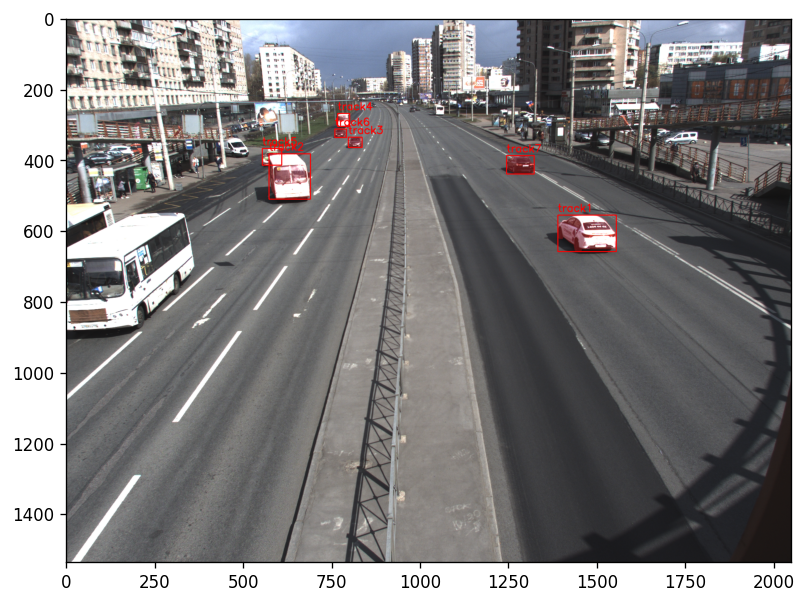

In [6]:
img = cv2.imread('images/0000000451.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for track_name in track_names:
    if os.path.exists(f'tracks/{track_name}/masks/0000000451_mask.tiff.png'):
        mask = load_mask(f'tracks/{track_name}/masks/0000000451_mask.tiff.png')
        img = add_track(img, mask, track_name)

plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img)

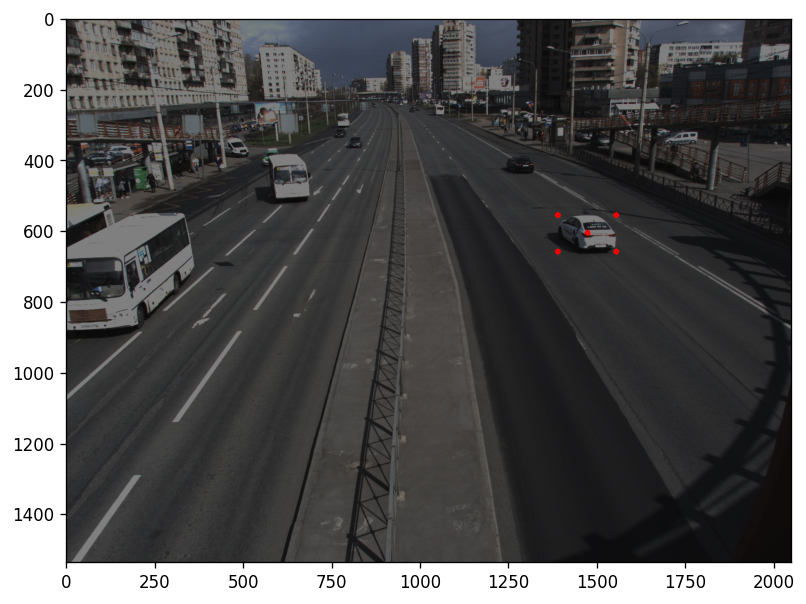

In [7]:
img = cv2.imread('images/0000000451.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = load_mask(f'tracks/track1/masks/0000000451_mask.tiff.png')
geometry = MaskGeometry(mask)
img = (img * 0.5).astype(int)
img = cv2.circle(img, geometry.mean_int, 5, (255, 0, 0), 5)
img = cv2.circle(img, geometry.top_left_corner_int, 5, (255, 0, 0), 5)
img = cv2.circle(img, geometry.top_right_corner_int, 5, (255, 0, 0), 5)
img = cv2.circle(img, geometry.bottom_right_corner_int, 5, (255, 0, 0), 5)
img = cv2.circle(img, geometry.bottom_left_corner_int, 5, (255, 0, 0), 5)
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img)

In [8]:
def track_dynamic_plot(track_name):
    gs = []
    frame_indexes = []
    for i in range(451, 600):
        path = f'tracks/{track_name}/masks/0000000{i}_mask.tiff.png'
        if os.path.exists(path):
            gs.append(MaskGeometry(load_mask(path)))
            frame_indexes.append(i)
    diffs = []
    for i in range(len(gs) - 1):
        diffs.append(gs[i] - gs[i + 1])

    plt.figure(figsize=(8, 6), dpi=120)
    plt.plot(frame_indexes[:-1], list(map(lambda t: t.top_left_corner, diffs)))
    plt.plot(frame_indexes[:-1], list(map(lambda t: t.top_right_corner, diffs)))
    plt.plot(frame_indexes[:-1], list(map(lambda t: t.bottom_right_corner, diffs)))
    plt.plot(frame_indexes[:-1], list(map(lambda t: t.bottom_left_corner, diffs)))
    plt.plot(frame_indexes[:-1], list(map(lambda t: t.mean, diffs)))
    plt.legend(['top_left_corner', 'top_right_corner', 'bottom_right_corner', 'bottom_left_corner', 'mean'])
    plt.title(track_name)

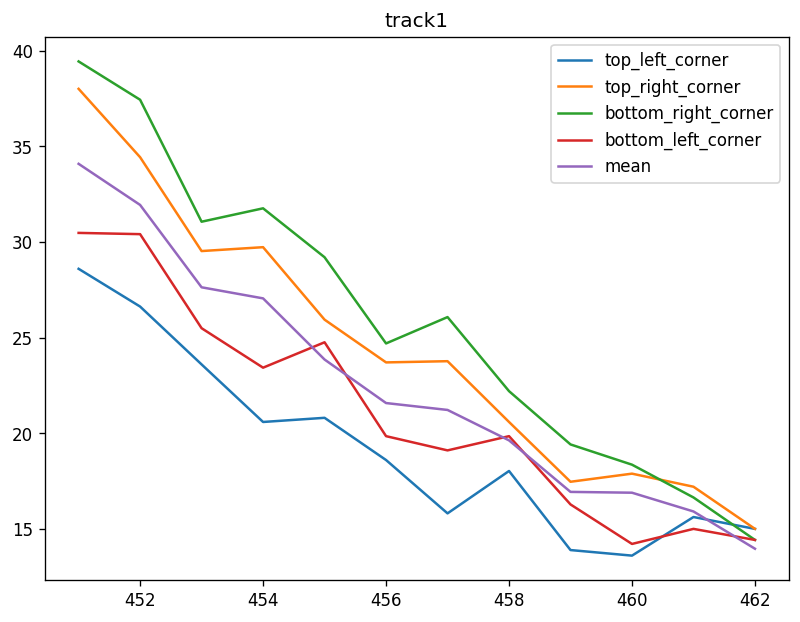

In [9]:
track_dynamic_plot('track1')

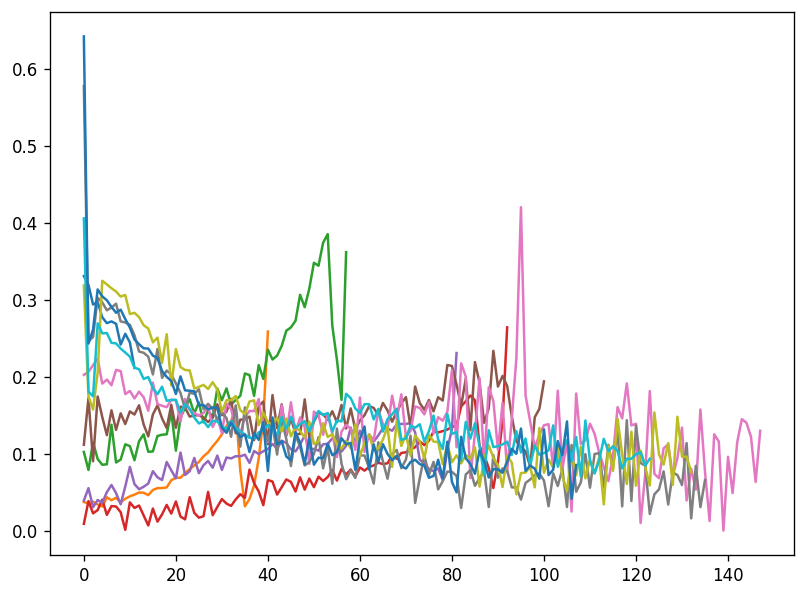

In [10]:
plt.figure(figsize=(8, 6), dpi=120)
for track_name in track_names:
    gs = []
    for i in range(451, 600):
        path = f'tracks/{track_name}/masks/0000000{i}_mask.tiff.png'
        if os.path.exists(path):
            gs.append(MaskGeometry(load_mask(path)))
    diffs = []
    for i in range(len(gs) - 1):
        if (gs[i] - gs[i + 1]).mean / gs[i].height > 1:
            print(track_name, i)
        diffs.append((gs[i] - gs[i + 1]).mean / gs[i].height)
    plt.plot(list(map(lambda t: t, diffs)))

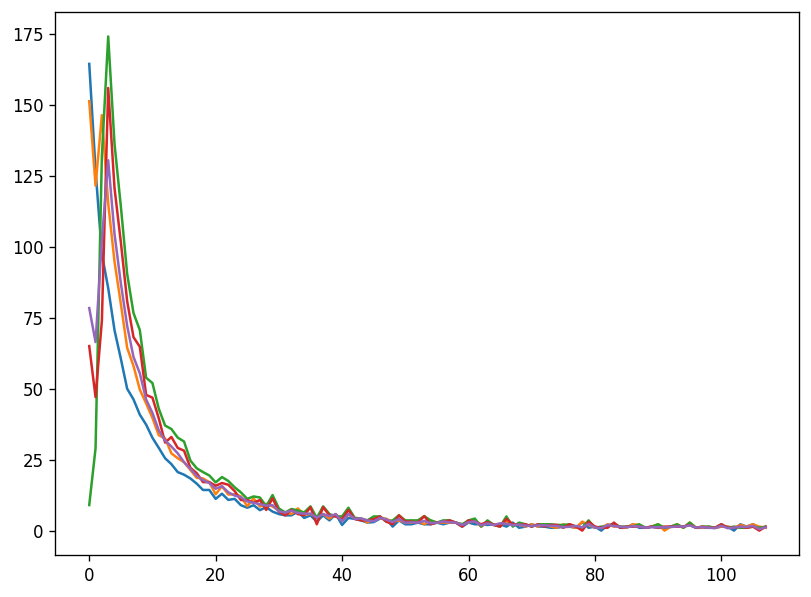

In [11]:
plt.figure(figsize=(8, 6), dpi=120)
for track_name in track_names:
    gs = []
    for i in range(451, 600):
        path = f'tracks/{track_name}/masks/0000000{i}_mask.tiff.png'
        if os.path.exists(path):
            gs.append(MaskGeometry(load_mask(path)))
    diffs = []
    for i in range(len(gs) - 1):
        if (gs[i] - gs[i + 1]).mean / gs[i].height > 1:
            print(track_name, i)
        diffs.append(gs[i] - gs[i + 1])

plt.plot(list(map(lambda t: t.top_left_corner, diffs)))
plt.plot(list(map(lambda t: t.top_right_corner, diffs)))
plt.plot(list(map(lambda t: t.bottom_right_corner, diffs)))
plt.plot(list(map(lambda t: t.bottom_left_corner, diffs)))
plt.plot(list(map(lambda t: t.mean, diffs)))